In [51]:
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import trange
import os
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize

def pool(mask, image, fn, kernel=5, stride=2):
    h_prev, w_prev = mask.shape

    labels = []
    values = []
    xs = []
    ys = []

    curr_y = out_y = 0
    # slide the max pooling window vertically across the image
    while curr_y + kernel <= h_prev:
        curr_x = out_x = 0
        # slide the max pooling window horizontally across the image
        while curr_x + kernel <= w_prev:
            # choose the maximum value within the window at each step and store it to   the output matrix

            if fn(mask[curr_y:curr_y + kernel, curr_x:curr_x + kernel]):
                labels.append(0)
            else:
                labels.append(1)

            values.append(np.ravel(image[curr_y:curr_y + kernel, curr_x:curr_x + kernel, 2]))
            ys.append((curr_y+curr_y + kernel)//2)
            xs.append((curr_x+curr_x+kernel)//2)
            curr_x += stride
            out_x += 1
        curr_y += stride
        out_y += 1

    return (labels, values, xs, ys)

def edge(img):
    return np.sum(img) >= 0




# Gathering Training Data

In [124]:
file_arr = [filename for filename in os.listdir('images/unmarked/masks/')]
X = []
y = []

kernel = 40
stride = 1

for i in trange(1):
    name = file_arr[i]
    im = Image.open('images/unmarked/masks/'+name)
    size = im.getdata().size
    img = np.array(im.getdata()).reshape((size[1],size[0],3))
    img = img[:,:,0]
    img[img>0] = 1
    img[img<=0] = -1

    im2 = Image.open('images/unmarked/train_cnn/'+name)
    img2 = np.array(im2.getdata()).reshape((size[1],size[0],3))
    
    (labels, values, xs, ys) = pool(img, img2, edge, kernel, stride)
    X += values
    y += labels


100%|██████████| 1/1 [00:07<00:00,  7.98s/it]


In [125]:
print(sum(labels)/len(labels))

0.3199594778046565


# Training

In [128]:
X_norm = normalize(X)
clf = MLPClassifier(hidden_layer_sizes=(4,), verbose=1).fit(X_norm,y)

Iteration 1, loss = 0.61957593
Iteration 2, loss = 0.60676718
Iteration 3, loss = 0.59312886
Iteration 4, loss = 0.57491389
Iteration 5, loss = 0.55596449
Iteration 6, loss = 0.53815179
Iteration 7, loss = 0.52678834
Iteration 8, loss = 0.51918451
Iteration 9, loss = 0.51286081
Iteration 10, loss = 0.50764545
Iteration 11, loss = 0.50201067
Iteration 12, loss = 0.49734149
Iteration 13, loss = 0.49209877
Iteration 14, loss = 0.48813860
Iteration 15, loss = 0.48319977
Iteration 16, loss = 0.47925215
Iteration 17, loss = 0.47474455
Iteration 18, loss = 0.47075376
Iteration 19, loss = 0.46696500
Iteration 20, loss = 0.46377687
Iteration 21, loss = 0.46034294
Iteration 22, loss = 0.45853940
Iteration 23, loss = 0.45545946
Iteration 24, loss = 0.45320374
Iteration 25, loss = 0.45159655
Iteration 26, loss = 0.45038825
Iteration 27, loss = 0.44851809
Iteration 28, loss = 0.44747789
Iteration 29, loss = 0.44631720
Iteration 30, loss = 0.44523178
Iteration 31, loss = 0.44463808
Iteration 32, los

In [129]:
sum(clf.predict(X_norm)/len(X_norm))

0.260043788467967

100%|██████████| 1/1 [00:06<00:00,  6.78s/it]


Text(0.5,1,'Female Archback 4.jpg Overlaid with Inside/Outside Classifier Predictions')

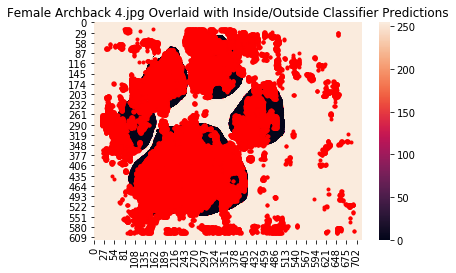

In [136]:
for i in trange(1):
    name = file_arr[i]
    im = Image.open('images/unmarked/masks/'+name)
    size = im.getdata().size
    img = np.array(im.getdata()).reshape((size[1],size[0],3))
    img = img[:,:,2]
#     img[img>0] = 1
#     img[img<=0] = -1

    im2 = Image.open('images/unmarked/train_cnn/'+name)
    img2 = np.array(im2.getdata()).reshape((size[1],size[0],3))
    
    (labels, values, xs, ys) = pool(img, img2, edge, kernel, stride)
    
scatterlist_x = []
scatterlist_y = []
predictions = clf.predict(X_norm)
for i in range(len(values)):
    if predictions[i] == 1:
        scatterlist_x.append(xs[i])
        scatterlist_y.append(ys[i])
sns.heatmap(img)
plt.plot(scatterlist_x, scatterlist_y, '.r', linestyle='None')
plt.title(name +  ' Overlaid with Inside/Outside Classifier Predictions')

In [133]:
print(len(scatterlist_x)/len(xs))

0.09247937506749442


In [23]:
print(name)

Female Archback 4.jpg


In [87]:
arr = np.array(im.getdata())
print(sum(arr==[0,0,0])[0]/len(arr))

0.2849935237991903
